# Clustering

## Loading the data

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
41,13.50,13.85,0.8852,5.351,3.158,2.249
172,11.27,12.97,0.8419,5.088,2.763,4.309
142,13.34,13.95,0.8620,5.389,3.074,5.995
62,12.36,13.19,0.8923,5.076,3.042,3.220
138,15.60,15.11,0.8580,5.832,3.286,2.725
158,11.75,13.52,0.8082,5.444,2.678,4.378
198,12.62,13.67,0.8481,5.410,2.911,3.306
42,13.16,13.55,0.9009,5.138,3.201,2.461
196,12.79,13.53,0.8786,5.224,3.054,5.483
37,17.08,15.38,0.9079,5.832,3.683,2.956


## Transform and Preprocessing

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# scaled_features = MinMaxScaler(feature_range=(0, 1)).fit_transform(features[data.columns[0:6]])
# print(scaled_features)

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

## Clustering the data based on dataset

n_clusters=3: specifies the number of clusters (centroids) to create.
init='k-means++': selects a smart initialization method for centroids to speed up convergence.
n_init=100: runs the KMeans algorithm 100 times with different centroid seeds to choose the best one.
max_iter=1000: sets the maximum number of iterations for each run.

Fits the KMeans model to the data in features.
Predicts the cluster assignments for each data point.
Stores the cluster assignments in km_clusters.

In [3]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

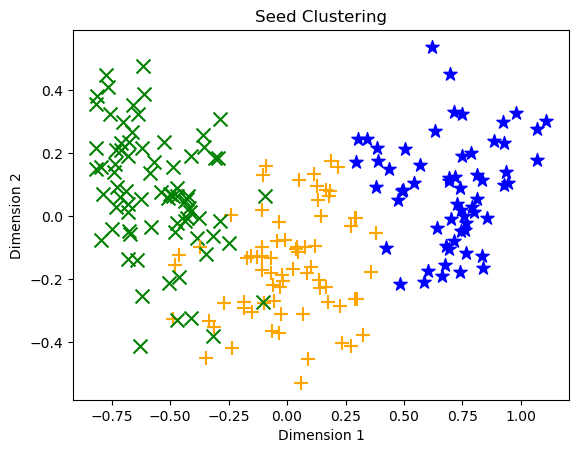

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Seed Clustering')
    plt.show()

plot_clusters(features_2d, km_clusters)

### If you want to have 4 clusters

In [5]:
from sklearn.cluster import KMeans

# Create a model based on 4 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 0, 2, 3, 0, 3, 3,
       2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 0, 3, 3, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0])

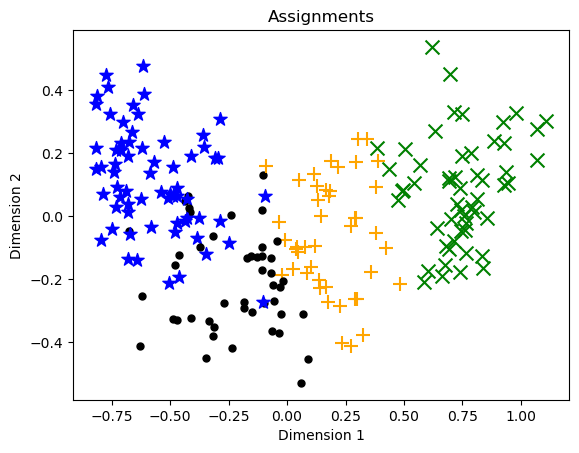

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'black'}
    mrk_dic = {0:'*',1:'x',2:'+',3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

Lets verify with our actual expected output.

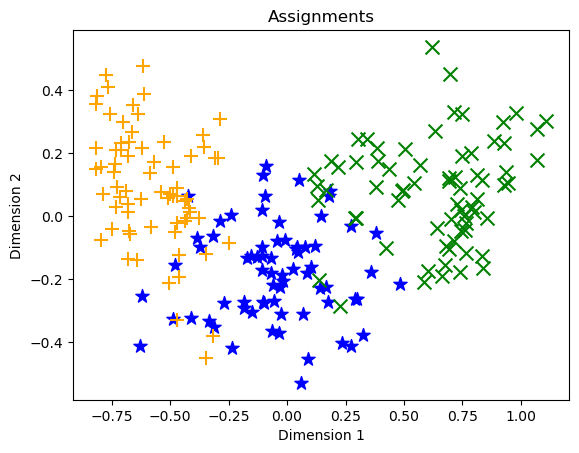

In [7]:
seed_species = data[data.columns[7]]
plot_clusters(features_2d, seed_species.values)

## Lets try with other algorithm

#### What is Agglormerative Clustering?
How to Pronounce: 
ag-glom-er-a-tive

Agglomerative Clustering is a type of hierarchical clustering algorithm. It starts by treating each data point as a separate cluster and then merges the closest pairs of clusters step by step until only one cluster remains or until a desired number of clusters is reached. The result is a tree-like structure called a dendrogram that shows how clusters are formed at each level.

In [8]:
import pandas as pd
from tabulate import tabulate

# Create a dictionary with the comparison data
data = {
    "Aspect": [
        "Approach",
        "Number of Clusters",
        "Complexity",
        "Cluster Shapes",
        "Deterministic",
        "Visualization",
        "Noise Sensitivity",
        "Common Use Case",
        "Implementation"
    ],
    "Agglomerative Clustering": [
        "Bottom-up; starts with individual items and merges them",
        "Decided during the merging process",
        "Slower; recalculates distances repeatedly",
        "Flexible; can create clusters of various shapes",
        "Yes; does not depend on initial cluster assignments",
        "Can be visualized using a dendrogram",
        "More sensitive to noise and outliers",
        "Understanding hierarchical relationships",
        "Hierarchical clustering methods; linkage criteria"
    ],
    "K-Means Clustering": [
        "Top-down; starts with predefined number of clusters",
        "Predefined at the beginning",
        "Faster; refines a fixed number of clusters",
        "Tends to create spherical clusters",
        "No; initial centroids can affect the final clusters",
        "Typically visualized using 2D/3D plots",
        "Can handle outliers but depends on the initial centroids",
        "Efficient partitioning of data",
        "Iterative algorithm; centroid-based"
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
# print(df)

# Print the DataFrame using tabulate
print(tabulate(df, headers='keys', tablefmt='pretty'))


+---+--------------------+---------------------------------------------------------+----------------------------------------------------------+
|   |       Aspect       |                Agglomerative Clustering                 |                    K-Means Clustering                    |
+---+--------------------+---------------------------------------------------------+----------------------------------------------------------+
| 0 |      Approach      | Bottom-up; starts with individual items and merges them |   Top-down; starts with predefined number of clusters    |
| 1 | Number of Clusters |           Decided during the merging process            |               Predefined at the beginning                |
| 2 |     Complexity     |        Slower; recalculates distances repeatedly        |        Faster; refines a fixed number of clusters        |
| 3 |   Cluster Shapes   |     Flexible; can create clusters of various shapes     |            Tends to create spherical clusters      

In [9]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

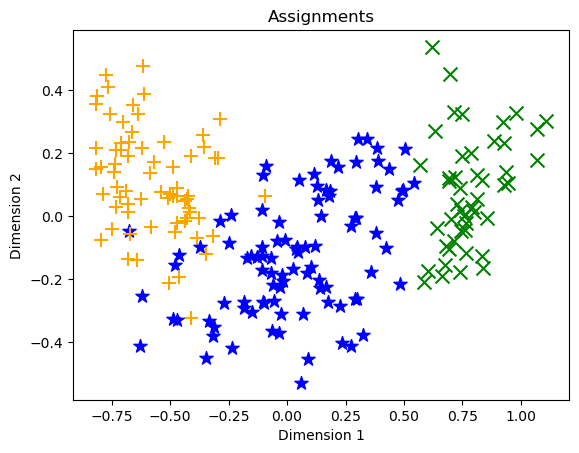

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)
